<a href="https://colab.research.google.com/github/SejalPawar13/BFS-Traversal-Algorithm/blob/main/FDS_504_Sejal_Pawar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 504 Sejal Pawar 

#[ FDS mini project Msc.cs Part 1 ]

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

### Matplotlib can be used to add to or change Seaborn plots

# Imports
## see python.org python package index for more info. on modules, etc.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vega_datasets import data as vds
from pydataset import data as pyds

# Seaborn Data

In [ ]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [ ]:
# data
# sns.get_dataset_names()
seaborn_data = ['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 
                'flights', 'fmri', 'gammas', 'iris', 'mpg', 'planets', 'tips', 'titanic']


# Relational Plots

**relplot**

Figure-level interface for drawing relational plots onto a FacetGrid.

relplot plots include scatter and line

In [ ]:
# data
cars = vds.cars()
cars['Year'] = cars['Year'].dt.year
cars.tail()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
401,15.6,4,140.0,86.0,27.0,ford mustang gl,USA,2790,1982
402,24.6,4,97.0,52.0,44.0,vw pickup,Europe,2130,1982
403,11.6,4,135.0,84.0,32.0,dodge rampage,USA,2295,1982
404,18.6,4,120.0,79.0,28.0,ford ranger,USA,2625,1982
405,19.4,4,119.0,82.0,31.0,chevy s-10,USA,2720,1982


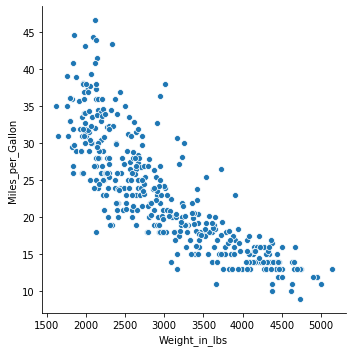

In [ ]:
# basic relplot (scatter plot)
# relplot kind can be line
sns.relplot(x='Weight_in_lbs', y='Miles_per_Gallon', data=cars, kind='scatter');

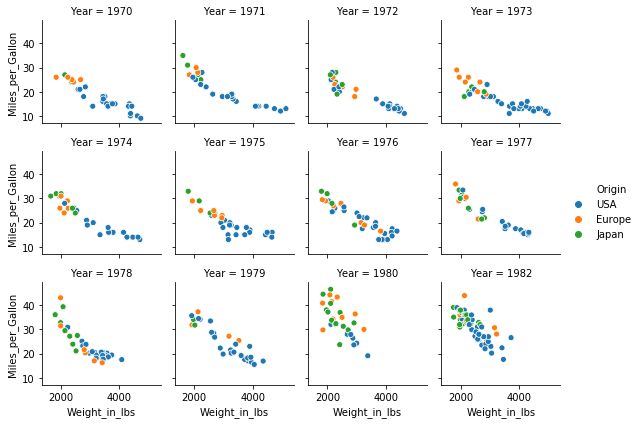

In [ ]:
# show Years using column wrap and Origin using hue color
sns.relplot(x='Weight_in_lbs', 
            y='Miles_per_Gallon', 
            hue='Origin', 
            col='Year', 
            col_wrap=4,
            height=2,
            data=cars);

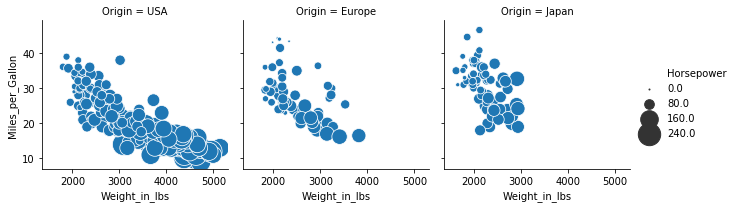

In [ ]:
# plot using size (see legend for size scale)
# use sizes to adjust size of bubbles
sns.relplot(x='Weight_in_lbs', 
            y='Miles_per_Gallon', 
            col='Origin',
            size='Horsepower',
            sizes=(1,500),
            height=3,
            data=cars);

**scatterplot**

Drawing a scatter plot with possibility of several semantic groupings.

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


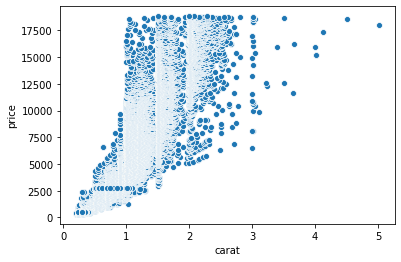

In [ ]:
sns.scatterplot(x='carat', y='price', data=diamonds);

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


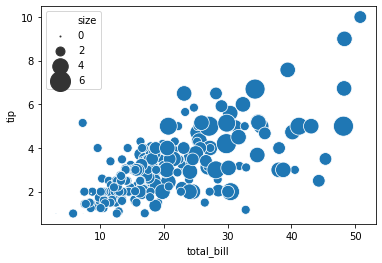

In [ ]:
# size
sns.scatterplot(x='total_bill', y='tip', data=tips, size='size', sizes=(1,400));

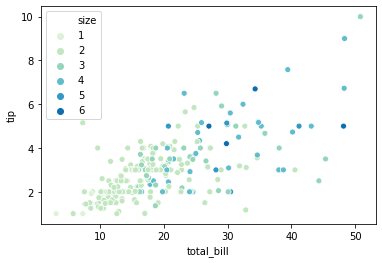

In [ ]:
# color palette
# use GnBu_r to reverse color palette, GnBu_d for dark colors
# see Seaborn documentation for details on color palettes
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='size', palette=sns.color_palette('GnBu'));

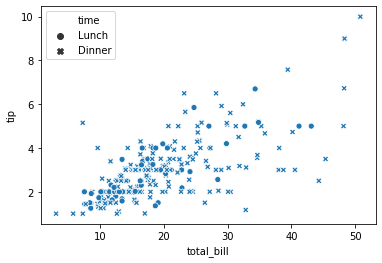

In [ ]:
# style
sns.scatterplot(x='total_bill', y='tip', data=tips, style='time');

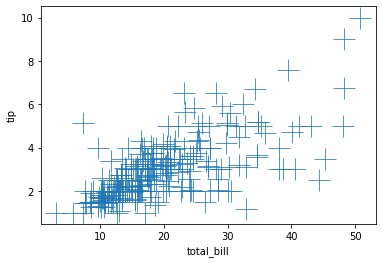

In [ ]:
# use matplotlib arguments
# use different way to pass in data (using df column)
sns.scatterplot(x=tips.total_bill, y=tips.tip, s=500, marker='+');

**lineplot**

Draw a line plot with possibility of several semantic groupings.

In [ ]:
seattle_weather = vds.seattle_weather()
seattle_weather.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


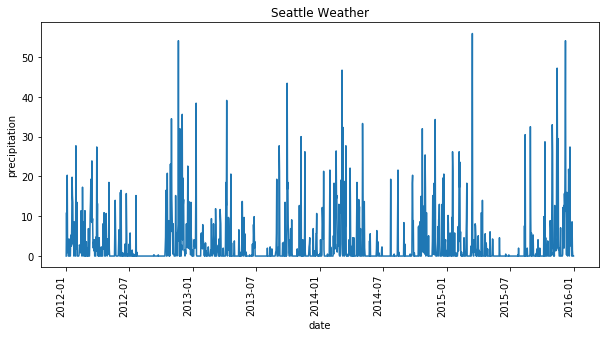

In [ ]:
# seattle weather precipitation by date
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=seattle_weather.date, y=seattle_weather.precipitation, ax=ax)
ax.set_title('Seattle Weather')
fig.autofmt_xdate(rotation=90)

In [ ]:
weather_aggregation = seattle_weather.set_index('date').resample('M').sum()
# weather_aggregation = seattle_weather.resample('M', on='date').sum()
weather_aggregation.head()

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,173.3,218.7,47.8,120.9
2012-02-29,92.3,269.0,92.9,113.2
2012-03-31,183.0,296.2,88.0,131.7
2012-04-30,68.1,446.2,179.8,101.2
2012-05-31,52.2,547.5,253.9,104.0


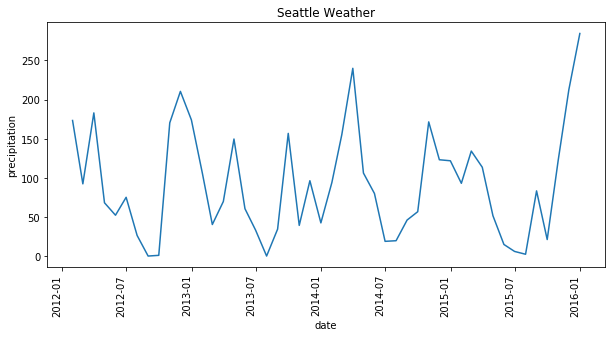

In [ ]:
# seattle weather precipitation by month
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=weather_aggregation.index, y=weather_aggregation.precipitation, ax=ax)
ax.set_title('Seattle Weather')
fig.autofmt_xdate(rotation=90)

In [ ]:
sf_temps = vds.sf_temps()
# remove time
sf_temps['date'] = pd.to_datetime(sf_temps['date'].dt.date)
sf_temps.tail()

,temp,date
8754,50.4,2010-12-31
8755,49.9,2010-12-31
8756,49.4,2010-12-31
8757,48.8,2010-12-31
8758,48.3,2010-12-31


In [ ]:
# reaction times in a sleep deprivation study
# reaction is average reaction time (ms)
# days are number of days of sleep deprivation

sleepstudy = pyds('sleepstudy')
sleepstudy.tail()

,Reaction,Days,Subject
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372
180,364.1236,9,372


In [ ]:
# pyds('sleepstudy', show_doc=True)

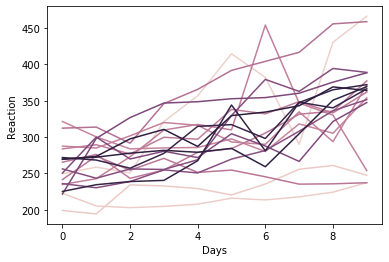

In [ ]:
# using hue (color) to plot subjects as seprate lines instead of one line with ci
# sns.lineplot(x=sleepstudy.Days, y=sleepstudy.Reaction, legend=False);
sns.lineplot(x=sleepstudy.Days, y=sleepstudy.Reaction, hue=sleepstudy.Subject, legend=False);

# Categorical Plots

**catplot**

Figure-level interface for drawing categorical plots onto a FacetGrid.

kinds include: point, bar, count, strip, swarm, box, violin, boxen

Note, when using certain plots such as catplot, data must be passed using 'x', 'y', dataframe form like in this example.

In [ ]:
# data
Arthritis = pyds('Arthritis')
Arthritis.head()

,ID,Treatment,Sex,Age,Improved
1,57,Treated,Male,27,Some
2,46,Treated,Male,29,None
3,77,Treated,Male,30,None
4,17,Treated,Male,32,Marked
5,36,Treated,Male,46,Marked


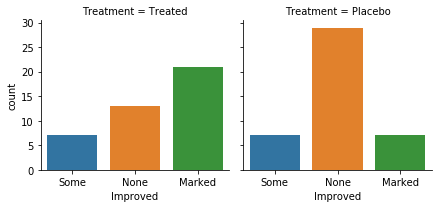

In [ ]:
# add col and/or row arguments to split data in different ways and add detail
# col / row helps visualize data in different ways
sns.catplot(x='Improved',
            col='Treatment',
            height=3,
            data=Arthritis,
            kind='count');

**stripplot**

Draw a scatterplot where one variable is categorical.

In [ ]:
cars.tail()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
401,15.6,4,140.0,86.0,27.0,ford mustang gl,USA,2790,1982
402,24.6,4,97.0,52.0,44.0,vw pickup,Europe,2130,1982
403,11.6,4,135.0,84.0,32.0,dodge rampage,USA,2295,1982
404,18.6,4,120.0,79.0,28.0,ford ranger,USA,2625,1982
405,19.4,4,119.0,82.0,31.0,chevy s-10,USA,2720,1982


The jitter argument offsets points so they don't overlap. This makes it easier to see the distribution. Default is True.

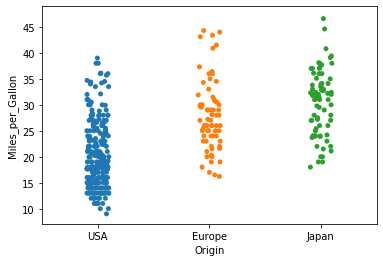

In [ ]:
sns.stripplot(x='Origin', y='Miles_per_Gallon', data=cars, jitter=True);

**boxplot**

Draw a box plot to show distributions with respect to categories.

shows minimum, maximum, median, first quartile (25th percentile), third quartile (75th percentile), and outliers

In [ ]:
iris = vds.iris()
iris.tail()

,petalLength,petalWidth,sepalLength,sepalWidth,species
145,5.2,2.3,6.7,3.0,virginica
146,5.0,1.9,6.3,2.5,virginica
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica
149,5.1,1.8,5.9,3.0,virginica


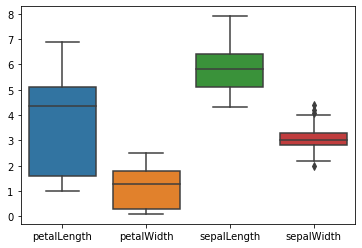

In [ ]:
sns.boxplot(data=iris);

# Distribution Plots

**distplot**

Flexibly plot a univariate distribution of observations.

In [ ]:
# measurements for black cherry trees
trees = pyds('trees')
trees.head()

,Girth,Height,Volume
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8


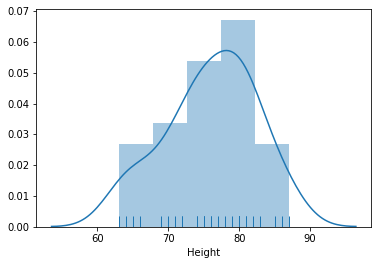

In [ ]:
# kernel density estimate and histogram
# use rug to draw small vertical lines to show each observation in a distribution
# kde=False to show just histogram
sns.distplot(trees.Height, rug=True, kde=True);

# Regression Plots

**lmplot**

Plot data and regression model fits across a FacetGrid.

In [ ]:
# pyds('Cars93', show_doc=True)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 30)

# data
Cars93 = pyds('Cars93')
Cars93.tail()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,5,2.5,109,4500,2915,Yes,21.1,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,4,2.0,134,5800,2685,Yes,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,6,2.8,178,5800,2385,Yes,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,4,2.3,114,5400,2215,Yes,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240
93,Volvo,850,Midsize,24.8,26.7,28.5,20,28,Driver & Passenger,Front,5,2.4,168,6200,2310,Yes,19.3,5,184,105,69,38,30.0,15.0,3245,non-USA,Volvo 850


In [ ]:
Cars93.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

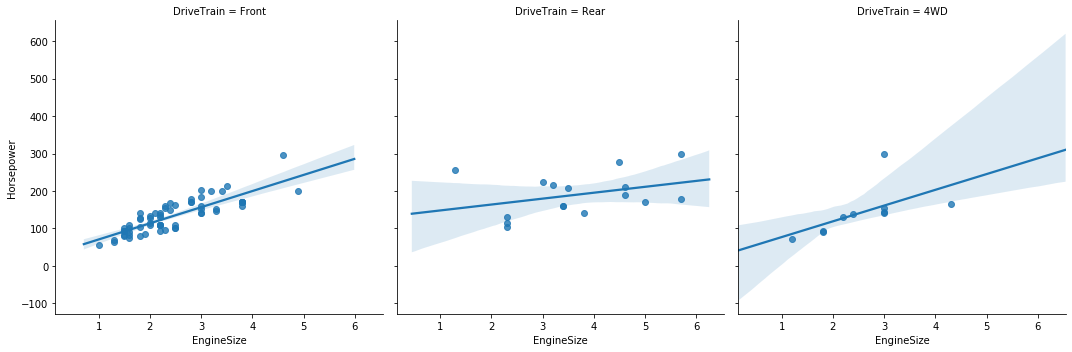

In [ ]:
# add col and/or row arguments to split data in different ways and add detail
# col / row helps visualize data in different ways
sns.lmplot(x='EngineSize', 
           y='Horsepower',
           col='DriveTrain',
           height=5,
           data=Cars93);

**regplot**

Plot data and a linear regression model fit.

In [ ]:
# data for speed of cars and distances needed to stop (data from 1920s)
speed_distance = pyds('cars')
speed_distance.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


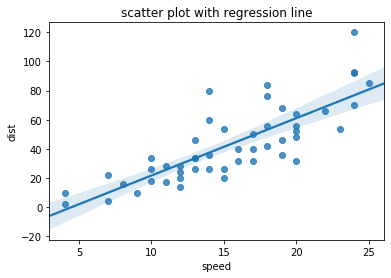

In [ ]:
sns.regplot(x='speed', y='dist', data=speed_distance, ci=95);
# plt.ylim([0,125])
plt.title('scatter plot with regression line');

**pairplot**

Plot pairwise relationships in a dataset.

In [ ]:
cars_pairplot = vds.cars()
# drop year
cars_pairplot.drop(['Year'], axis=1, inplace=True)
cars_pairplot.tail()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs
401,15.6,4,140.0,86.0,27.0,ford mustang gl,USA,2790
402,24.6,4,97.0,52.0,44.0,vw pickup,Europe,2130
403,11.6,4,135.0,84.0,32.0,dodge rampage,USA,2295
404,18.6,4,120.0,79.0,28.0,ford ranger,USA,2625
405,19.4,4,119.0,82.0,31.0,chevy s-10,USA,2720


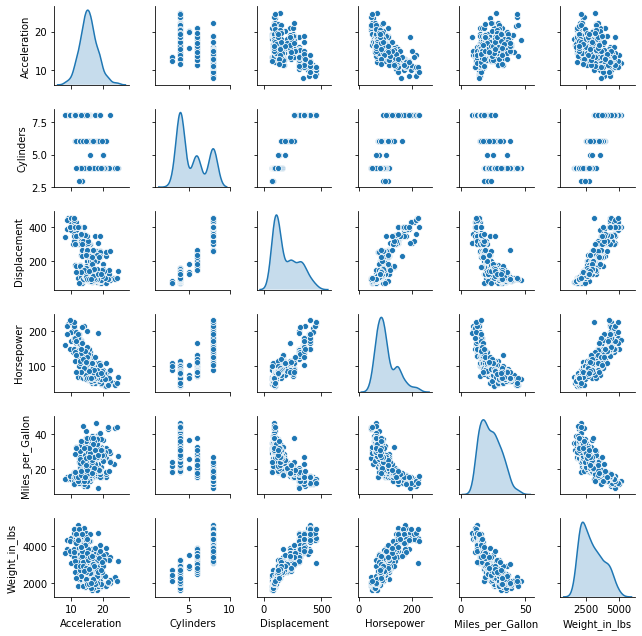

In [ ]:
# quick way to show relationships between data elements
# kind and diag_kind arguments can be changed to change plot types
# kind='reg' to fit linear regression model
sns.pairplot(cars_pairplot.dropna(), diag_kind='kde', height=1.5);

**PairGrid**

Subplot grid for plotting pairwise relationships in a dataset.

**PairGrid.map**

Plot with the same function in every subplot.

In [ ]:
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


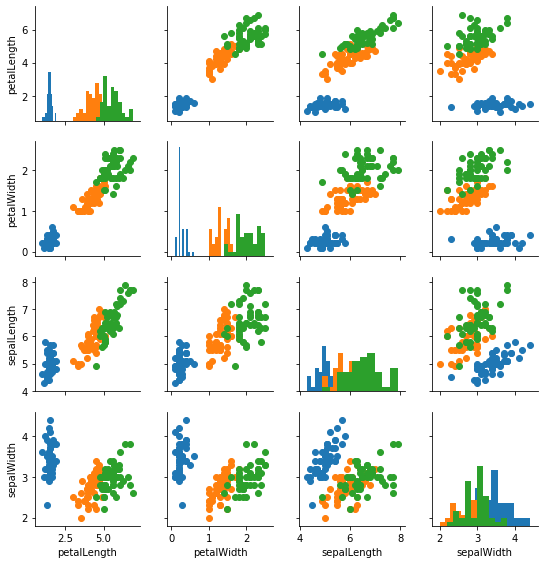

In [ ]:
pair_grid = sns.PairGrid(iris, height=2, hue='species')
pair_grid.map_diag(plt.hist);
pair_grid.map_offdiag(plt.scatter);

### Joint Grids

In [ ]:
# sales prices of houses in the city of Windsor from 1987
Housing = pyds('Housing')
Housing.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


**JointGrid.plot**

Shortcut to draw the full plot.

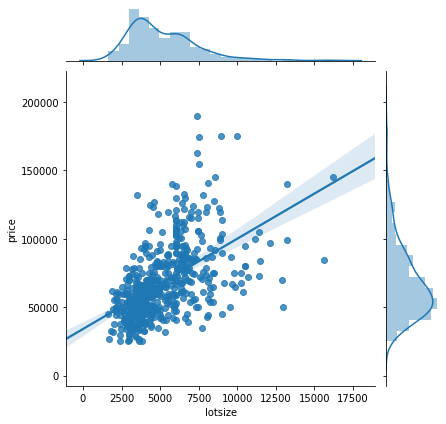

In [ ]:
sns.JointGrid(x='lotsize', y='price', data=Housing).plot(sns.regplot, sns.distplot);

**JointGrid.plot_marginals**

Draw univariate plots for x and y separately.

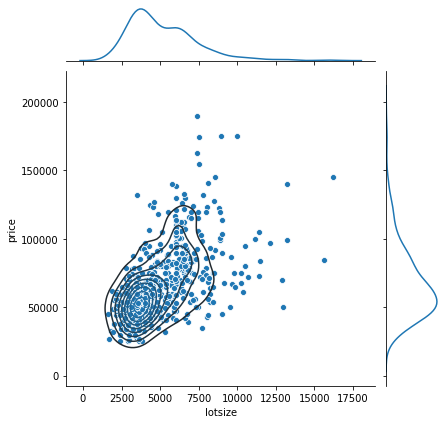

In [ ]:
joint_grid = sns.JointGrid(x='lotsize', y='price', data=Housing)
joint_grid = joint_grid.plot_joint(sns.scatterplot)
joint_grid = joint_grid.plot_joint(sns.kdeplot)
joint_grid = joint_grid.plot_marginals(sns.kdeplot)